In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline


In [3]:
train_data=pd.read_csv('fraudTrain.csv')
test_data=pd.read_csv('fraudTest.csv')


In [4]:
train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [5]:
test_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [7]:
train_data.drop(columns=['Unnamed: 0','first', 'last', 'street', 'city','trans_date_trans_time','trans_num','dob','amt'],inplace=True)
test_data.drop(columns=['Unnamed: 0','first', 'last', 'street', 'city','trans_date_trans_time','trans_num','dob','amt'],inplace=True)
train_data.head()

,cc_num,merchant,category,gender,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,F,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,F,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,38859492057661,fraud_Lind-Buckridge,entertainment,M,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,M,MT,59632,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,375534208663984,fraud_Keeling-Crist,misc_pos,M,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0


In [8]:
encoder = LabelEncoder()
train_data["merchant"] = encoder.fit_transform(train_data["merchant"])
train_data["category"] = encoder.fit_transform(train_data["category"])
train_data["gender"] = encoder.fit_transform(train_data["gender"])
train_data["job"] = encoder.fit_transform(train_data["job"])
train_data["state"] = encoder.fit_transform(train_data["state"])
test_data["merchant"] = encoder.fit_transform(test_data["merchant"])
test_data["category"] = encoder.fit_transform(test_data["category"])
test_data["gender"] = encoder.fit_transform(test_data["gender"])
test_data["job"] = encoder.fit_transform(test_data["job"])
test_data["state"] = encoder.fit_transform(test_data["state"])

<Axes: xlabel='gender', ylabel='count'>

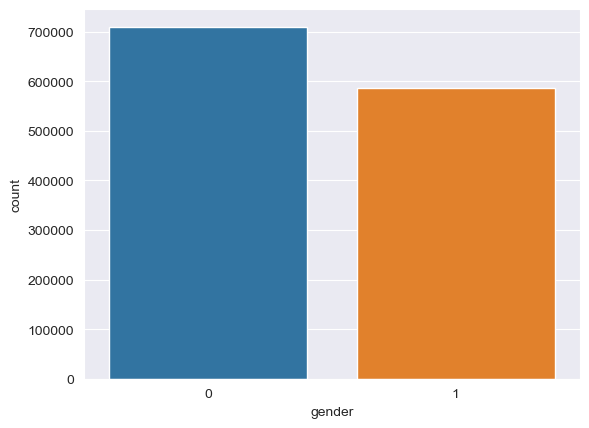

In [9]:
sns.set_style("darkgrid")
sns.countplot(data = train_data, x = "gender")

In [10]:
X = train_data.drop(['is_fraud'], axis=1)
y = train_data['is_fraud']
X1 = test_data.drop(['is_fraud'], axis=1)
y1 = test_data['is_fraud']

In [11]:
clf = GridSearchCV(LogisticRegression(solver='liblinear', multi_class='auto'), {
    'C': [1,10,20],
}, cv=5, return_train_score=False)
clf.fit(X, y)
clf.cv_results_
train_data1 = pd.DataFrame(clf.cv_results_)
train_data1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.787271,0.370078,0.073884,0.005785,1,{'C': 1},0.994212,0.994212,0.994212,0.994212,0.994208,0.994211,0.000002,1
1,2.801904,0.184930,0.081183,0.002720,10,{'C': 10},0.994212,0.994212,0.994212,0.994212,0.994208,0.994211,0.000002,1
2,2.874514,0.041995,0.075400,0.005071,20,{'C': 20},0.994212,0.994212,0.994212,0.994212,0.994208,0.994211,0.000002,1


In [12]:
from sklearn.metrics import accuracy_score
Model1=LogisticRegression(solver='liblinear', multi_class='auto',C=10)
Model1.fit(X, y)
y_pred = Model1.predict(X1)
accuracy = accuracy_score(y1, y_pred)
print("Accuracy:", accuracy)
score=[]
score.append(accuracy)
score

Accuracy: 0.9961401355721147


[0.9961401355721147]

In [13]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Shape of X:", X1.shape)
print("Shape of y:", y1.shape)

Shape of X: (1296675, 13)
Shape of y: (1296675,)
Shape of X: (555719, 13)
Shape of y: (555719,)


In [14]:
rs = RandomForestClassifier()
rs.fit(X,y)
y_pred = rs.predict(X1)
accuracy = accuracy_score(y1, y_pred)
print("Accuracy:", accuracy)
score.append(accuracy)
score

Accuracy: 0.995141429391473


[0.9961401355721147, 0.995141429391473]

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
rs = RandomForestClassifier()
rs.fit(X, y)
y_pred = rs.predict(X1)
accuracy = accuracy_score(y1, y_pred)
print("Accuracy:", accuracy)
score[1]=0.9938982397285364
score

Accuracy: 0.9948877040374722


[0.9961401355721147, 0.9938982397285364]

In [16]:
clf = GridSearchCV(tree.DecisionTreeClassifier(random_state=0), {
            'criterion': ['gini', 'entropy']
,
}, cv=10, return_train_score=False)
clf.fit(X, y)
clf.cv_results_
train_data3 = pd.DataFrame(clf.cv_results_)
train_data3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,39.187801,2.142791,0.064627,0.017432,gini,{'criterion': 'gini'},0.006,0.506200,0.370076,0.743476,0.964270,0.985278,0.991833,0.944627,0.941604,0.006216,0.645958,0.379034,1
1,40.545788,1.794115,0.060533,0.013757,entropy,{'criterion': 'entropy'},0.006,0.417374,0.311719,0.661944,0.957916,0.979956,0.992774,0.966607,0.907185,0.037473,0.623895,0.379389,2


In [17]:
Dtree=tree.DecisionTreeClassifier(random_state=0,criterion='entropy',splitter="best")
Dtree.fit(X, y)
y_pred = Dtree.predict(X1)
accuracy = accuracy_score(y1, y_pred)
print("Accuracy:", accuracy)
score.append(accuracy)

Accuracy: 0.9815068406874697


In [18]:
plt.rcParams["figure.figsize"] = (20,15)

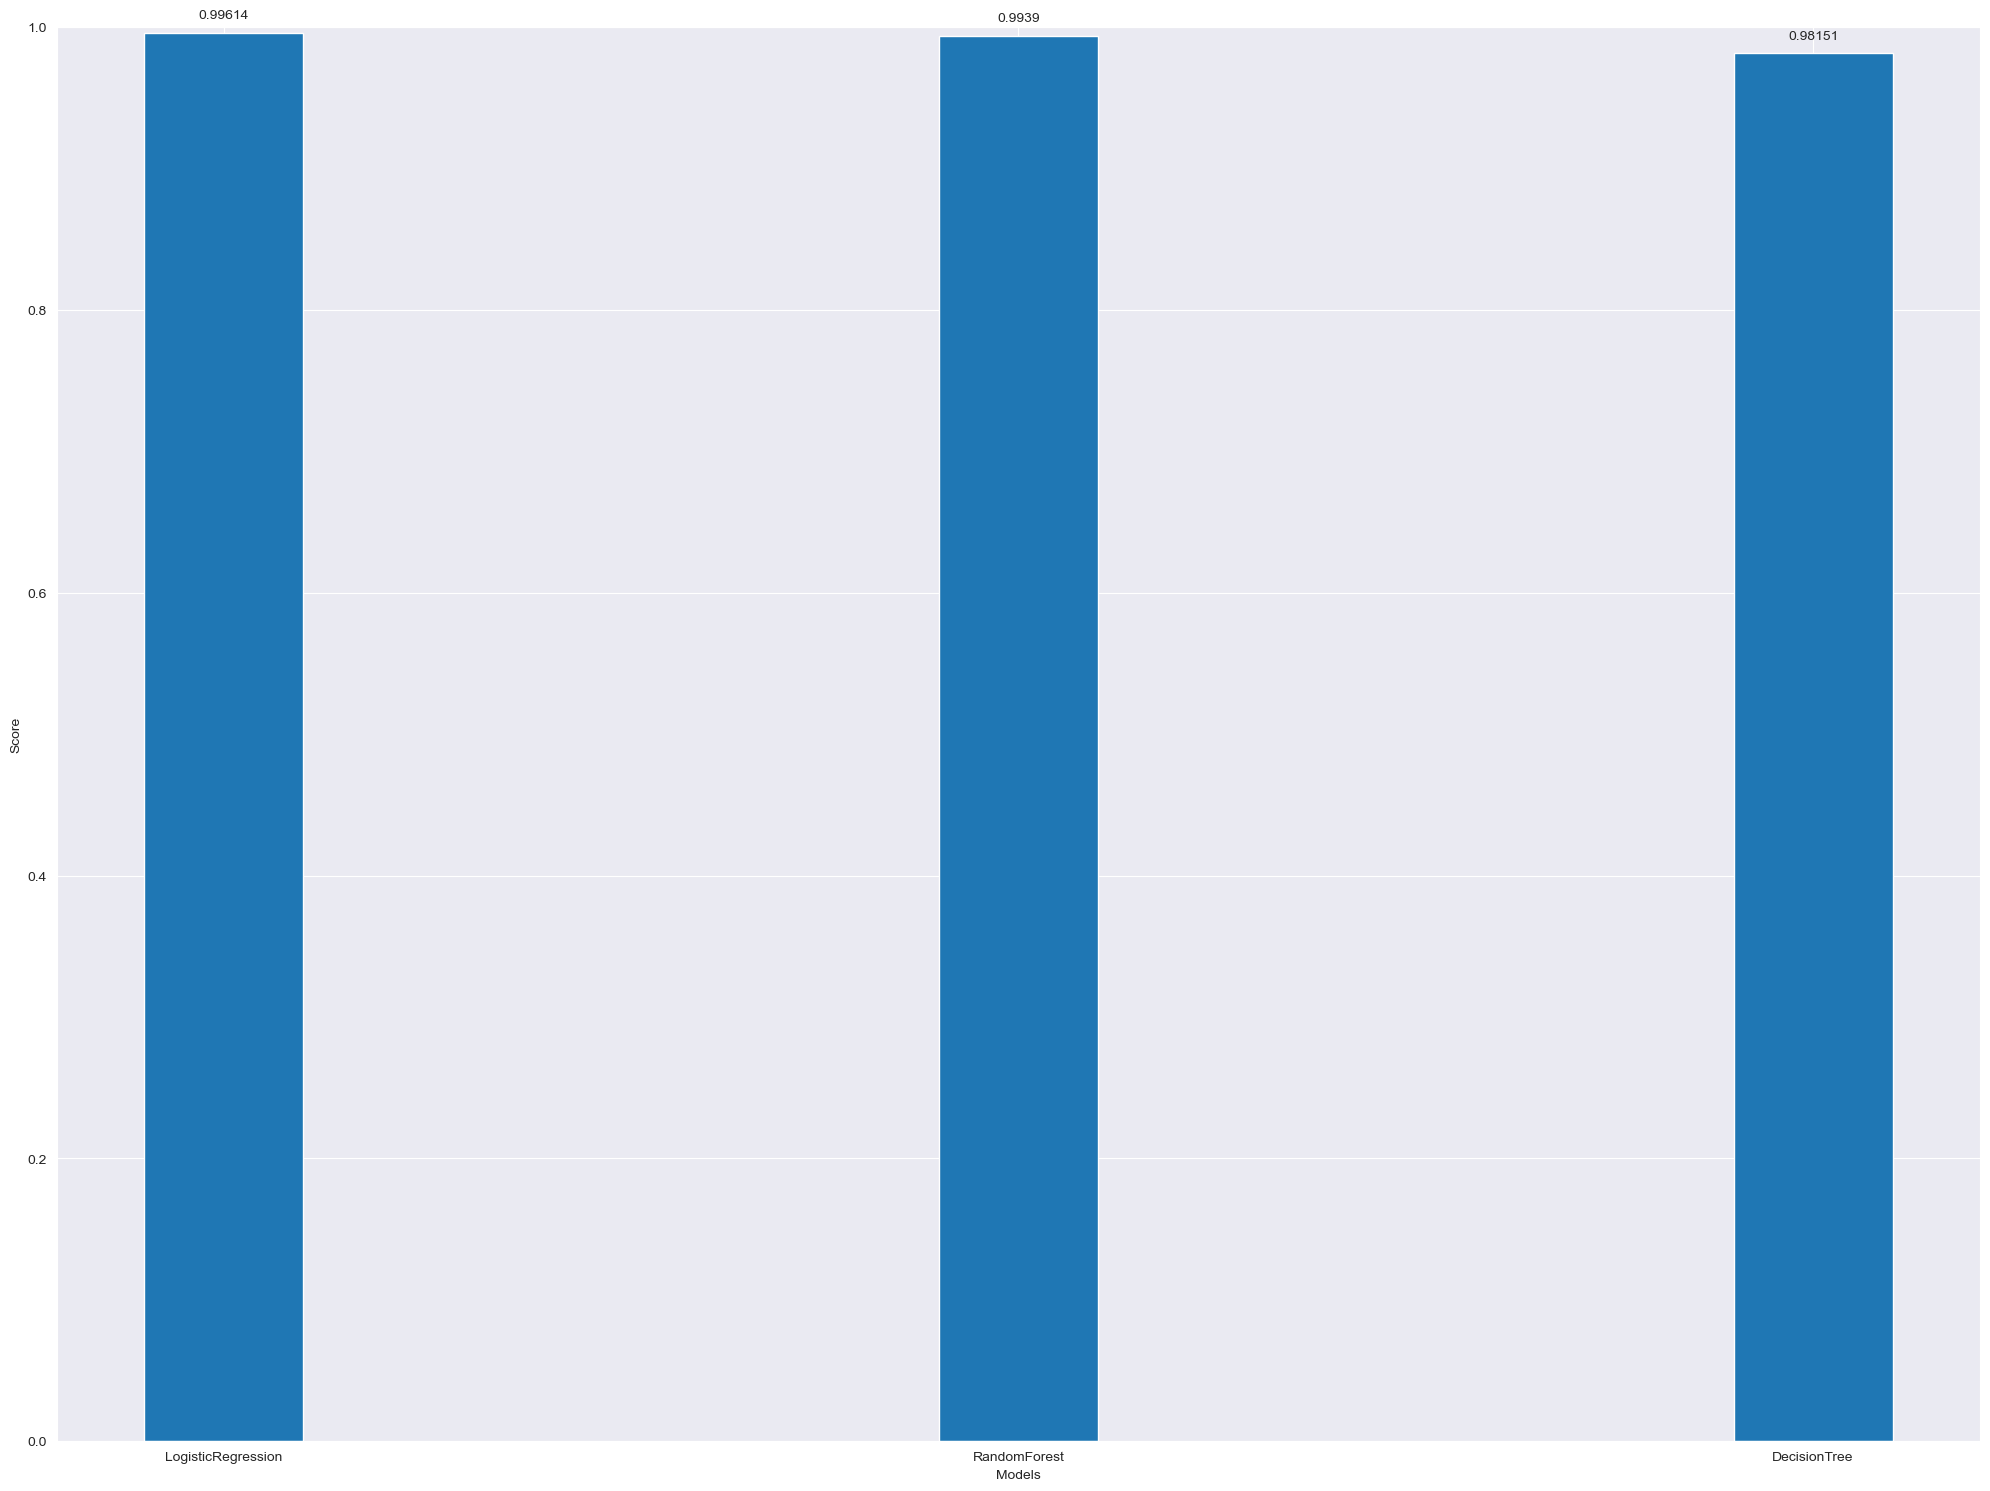

In [19]:
Models = ['LogisticRegression', 'RandomForest', 'DecisionTree']
y = score

fig, ax = plt.subplots()

x = np.arange(len(Models))

ax.bar(x, y, width=0.2)
ax.set_xticks(x)
ax.set_xticklabels(Models)
ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_ylim(0, 1.0)  

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.01 , s=str(round(value, 5)), ha='center')

plt.tight_layout()
plt.show()